# Basic classification: Classify images of clothing

#### A simple Neural Network model to classify images of clothing 

#### This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here: 

### Importing Useful Libraries 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Import the Fashion MNIST dataset 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

NB : The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9

### Load dataset 

In [3]:
# train_images and train_labels arrays are the training set— the data the model uses to learn
# We test our Model against the test set, the test_images, and test_labels arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Create Class names for each item 

In [5]:
#Each image is mapped to a single label. 
#Since the class names are not included with the dataset, we store them here to use later when plotting the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration 

In [6]:
# TRAINING DATA
# This indicates theat we have 60,000 images in the training set, with each image represented as 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [7]:
# We have an equal number for the labels hence no missig data
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# TESTING DATA
# This indicates theat we have 10,000 images in the training set, with each image represented as 28 x 28 pixels
test_images.shape

(10000, 28, 28)

In [10]:
# We have an equal number for the labels hence no missig data
len(test_labels)

10000

### Preprocess the data 

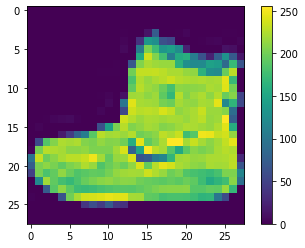

In [11]:
# By doing a quick inspection of the image , we can observe that the pixel values fall in the range of 0 to 255
# We need to scale (STANDARDIZE) both our Train and Test data to a range between 1 - 0 before feeding it to our model
# We can do this by dividing both our Train and Test data by 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Standardize Data 

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

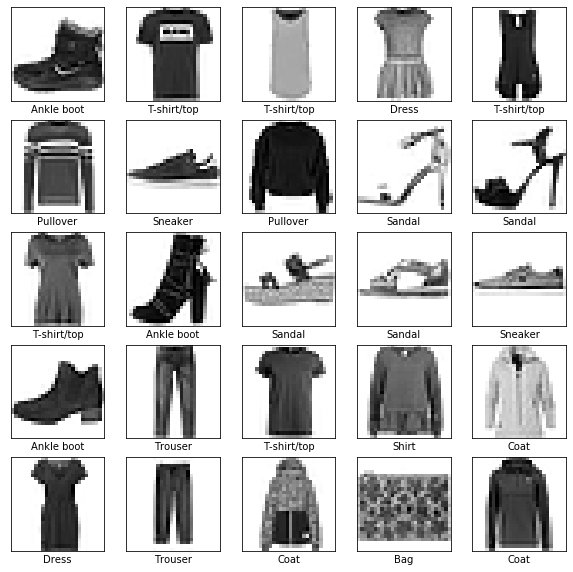

In [16]:
# Now let us display the first 25 images to verify if our data is in the right format

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the Model 

In [20]:
# The first layer in this network transforms the format of the images... 
#...from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
# The second (and last) layer returns a logits array with length of 10.
#Each node contains a score that indicates the current image belongs to one of the 10 classes
# 128 stands for tthe number of nodes (neurons)
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compile the model 

In [21]:
# Loss function measures how accurate the model is during training
# Optimizer —This is how the model is updated based on the data it sees and its loss function
# Metrics —Used to monitor the training and testing steps. 
# The following example uses accuracy, the fraction of the images that are correctly classified

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train The Model

In [22]:
# As the model trains, the loss and accuracy metrics are displayed.
# This model reaches an accuracy of about 0.91 (or 91%) on the training data.
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5006 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3784 - accuracy: 0.8621
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3375 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3142 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2947 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2799 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2697 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2559 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2458 - accuracy: 0.9089
Epoch 10/10
60

### Evaluate accuracy of the model 

In [23]:
# We compare how the model performs on the test data
# Our accuracy was 0.8849 which represents overfitting 
# which happens when a model performs worse on new , previously unseen inputs than it does on the training data

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3322 - accuracy: 0.8840

Test accuracy: 0.884


### Making Predictions 

In [24]:
# With the model trained, we can use it to make predictions about some images. 
# The model's linear outputs are currently logits.
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
# Here, the model has predicted the label for each image in the testing set. 
# Let's take a look at the first prediction
# Each prediction is an array of 10 numbers representing the model's "confidence"..
# ...that the image corresponds to each of the 10 different articles of clothing. 
# You can see which label has the highest confidence value
predictions[0]

array([2.1179231e-07, 1.1080271e-09, 6.0908492e-09, 3.7036151e-12,
       2.6003167e-07, 7.4138009e-04, 1.5627096e-08, 2.1352805e-02,
       1.2697097e-06, 9.7790396e-01], dtype=float32)

### Convert array to readable format 

In [27]:
# Argmax is most commonly used in machine learning for finding the class with the largest predicted probability
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

### Lets put this into a Graph 

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify Predictions 

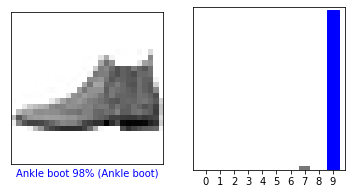

In [33]:
# We can now make predictions for some of the images now that our model has been trained
# Correct prediction labels are blue and incorrect prediction labels are red
# The number gives the percentage (out of 100) for the predicted label

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

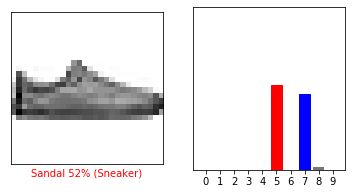

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Plot several images with their prediction 

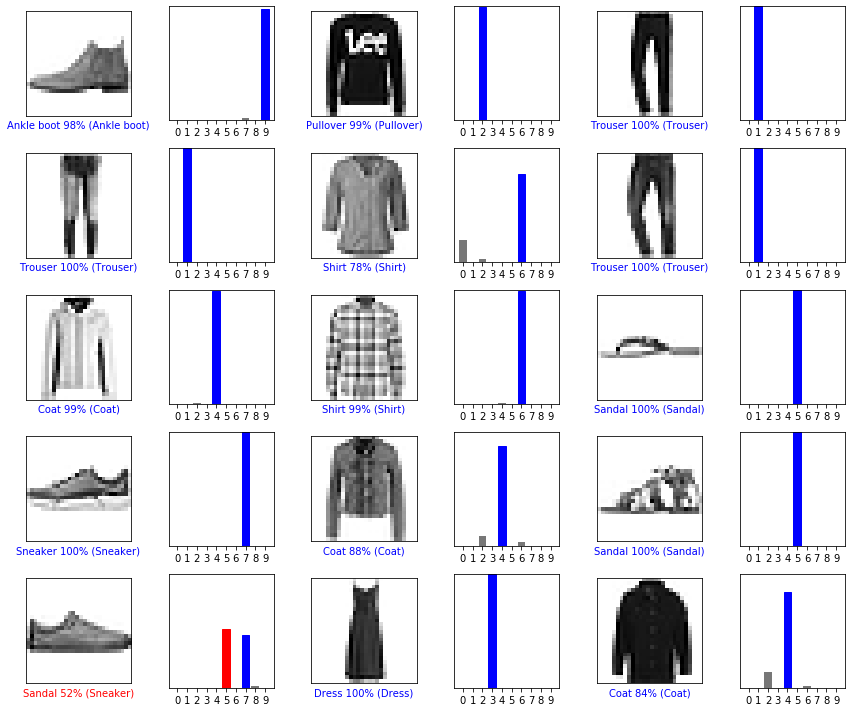

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [36]:
# Using the trained model to make a prediction about a single image
# Grab an image from the test dataset.
# models are optimized to amke predictions on a batch, or collection at once
img = test_images[1]
# we must add our image to a batch although its the only one
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


### Now Predict 

In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.9320713e-04 1.5242912e-13 9.9495137e-01 1.5776612e-10 4.2167339e-03
  5.1348643e-12 3.3871323e-04 2.4210201e-10 6.1721558e-11 1.6053370e-12]]


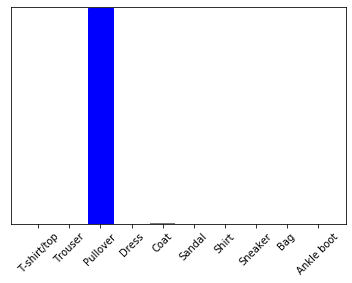

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
np.argmax(predictions_single[0])

2